In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import sys 

# We need to solve this once and for all
sys.path.append('/Users/sdea/Coding/pyCASINO')

from pycasino import functions, constants, utils

In [2]:
# Parameters for silicon 
E_beam = 30     # keV 
Z = 14          # Silicon 
A = 28.0855     # Atomic weight (g/mol) 
rho = 2.33      # Density (g/cm3)

# Parameters for the simulation
# The simulation consists on a bulk material, with no inclination respect to the electron beam 
x = 0
y = 0
theta = 0
N_electrons = 1000
max_events = 1000


In [3]:
# Here we test the new function
bse_list_final, x_list_final, y_list_final = functions.simulate_bulk_interaction(E_beam, Z, A, rho, radius=0, center=0, num_electrons=500)

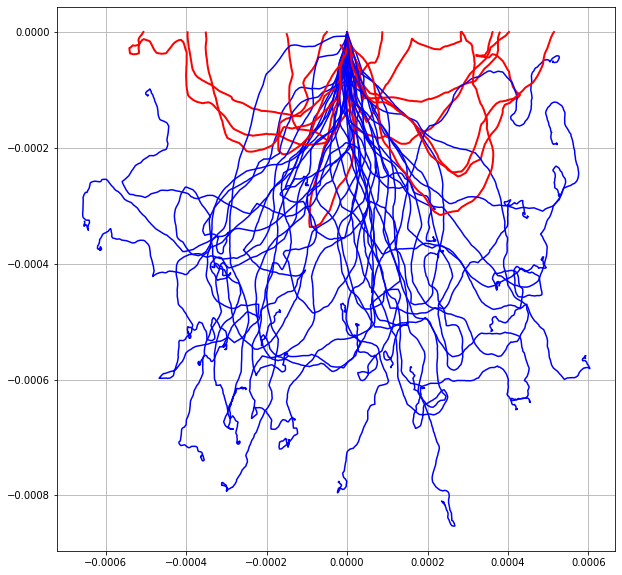

In [4]:
# Plot the results 
utils.plot_simulation_results(x_list_final, y_list_final, bse_list_final)

In [6]:
# Make the simulation function
J = functions.compute_J(Z)
E = E_beam
dEdS = -78500 * ((rho * Z) / (A * E)) * np.log((1.166 * E) / J + 1)
print(dEdS)

-16166.770804593343


In [9]:
alpha = functions.compute_alpha(E, Z)
sigma = functions.compute_sigma(E, Z, alpha)
lambda_mean = functions.compute_lambda(A, rho, sigma)
step = functions.compute_step(lambda_mean)

print(step)
print(alpha)
print(sigma)

5677416883014248.0
0.0006641458239746167
5.652267047086854e-18


In [11]:
N_a

6.02214076e+23